In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [30]:
# load BATSE t90 dat
_, _, _, _, t90, _, _ =np.loadtxt('../data/batse_duration.txt',unpack=True)
np.save('batse_t90.npy',t90)
x = np.log10(t90)

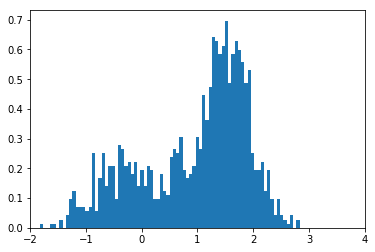

In [31]:
plt.hist(x, 80, normed=True)
plt.xlim(-2, 4);

In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

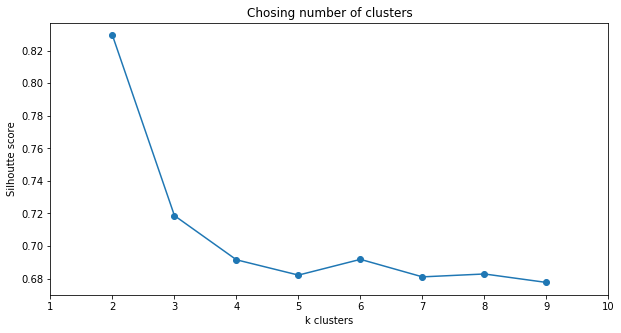

In [29]:
X = x[:, np.newaxis]
n_clusters = np.arange(2, 10)
silh_scores = []
for n in n_clusters:
    clf = KMeans(n_clusters=n).fit(X)
    labels = clf.labels_
    
    # score = clf.score(X) # elbow method
    
    score = silhouette_score(X, labels, metric='sqeuclidean')
    
    silh_scores.append(score)
    
    
plt.figure(figsize=(10,5))
plt.plot(n_clusters,silh_scores,linestyle='-', marker='o')
plt.xlim((1,max(n_clusters)+1))
plt.xlabel('k clusters')
plt.ylabel('Silhoutte score')
plt.title('Chosing number of clusters');

In [24]:
from sklearn.mixture import GaussianMixture

In [12]:
GaussianMixture?

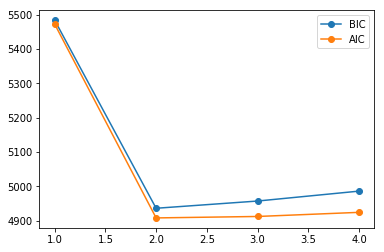

In [26]:
X = x[:, np.newaxis]
n_estimators = np.arange(1, 5)
clfs = [GaussianMixture(n_components=n, max_iter=1000).fit(X) for n in n_estimators]
bics = [clf.bic(X) for clf in clfs]
aics = [clf.aic(X) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC', marker='o')
plt.plot(n_estimators, aics, label='AIC', marker='o')
plt.legend();